<a href="https://colab.research.google.com/github/venkateshblks/NLP-password-strength/blob/main/NLP_password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Password - 1000k unique values for password collected online**

**textStrength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)**


**The passwords used in our analysis are from 000webhost leak that is available online**

## 1.. read data from SQL Database !

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# to create a SQL connection to our SQLite database
con = sqlite3.connect("password_data.sqlite")

In [3]:
con

In [4]:
data=pd.read_sql_query("SELECT * FROM Users" , con)
data

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1
...,...,...,...
99995,99995,obejofi215,1
99996,99996,fmiopvxb64,1
99997,99997,czvrbun38,1
99998,99998,mymyxe430,1


## 2.. data cleaning !

In [5]:
data.drop(["index"] , axis=1 , inplace=True)

In [6]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  100000 non-null  object
 1   strength  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [10]:
data["strength"].unique()

array([1, 2, 0])

## 3.. Performing Semantic Analysis !

In [11]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [12]:
data['password'][0]

'zxe870819'

In [13]:
type(data['password'][0])

str

### a) How many password textual actually holds only numeric characters ?

In [14]:
data.password.str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [15]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [16]:
data[data["password"].str.isnumeric()].shape

(26, 2)

**only 26 people have set their password as only number !**

### b) How many password textual actually holds only Upper-case character ?

In [17]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


**around 1500 users have their password as only capital letters !**

### c) How many password textual actually holds only alphabet ?

In [18]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [19]:
data[data["password"].str.isalpha()].shape

(50, 2)

**around 50 users have their password as alphabet letters only !**

### d) How many password textual actually holds alpha-numeric character ?

In [20]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


**most of the users around 97K have their password as alpha-numeric..**

### e) How many password textual actually holds title-case character ?

In [21]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


**around 932 users have their password having first alphabet capital !**

### f) How many password textual actually holds special character ?

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [24]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [25]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


 **2663 observations have special characters in between them ..**

**2.6% people password actually uses special character in their password ..**

## 4.. Applying Feature Engineering !

In [26]:
data["password"][0]

'zxe870819'

In [27]:
len(data["password"][0])

9

In [28]:
data["length"] = data["password"].str.len()
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


### Frequency of Lowercase Characters :

In [29]:
password='zxe870819'
[char for char in password if char.islower()]

['z', 'x', 'e']

In [30]:
len([char for char in password if char.islower()])

3

In [31]:
len([char for char in password if char.islower()])/len(password)

0.3333333333333333

In [32]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

###Frequency of Uppercase Characters :

In [33]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

### Frequency of Numeric Characters :

In [34]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [35]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [36]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


###Frequency of Special-case Characters :

In [37]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [38]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [39]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [40]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [41]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


## 5.. Performing Descriptive Statistics !

In [42]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [43]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

**Higher the length, Higher the strength**

**In case on alphabet frequency higher is not better.**

**Probably because it'll not be a strong password if max portion is occupied by just alphabets.**
**Password has more strength if the char types are spread in decent proportions**

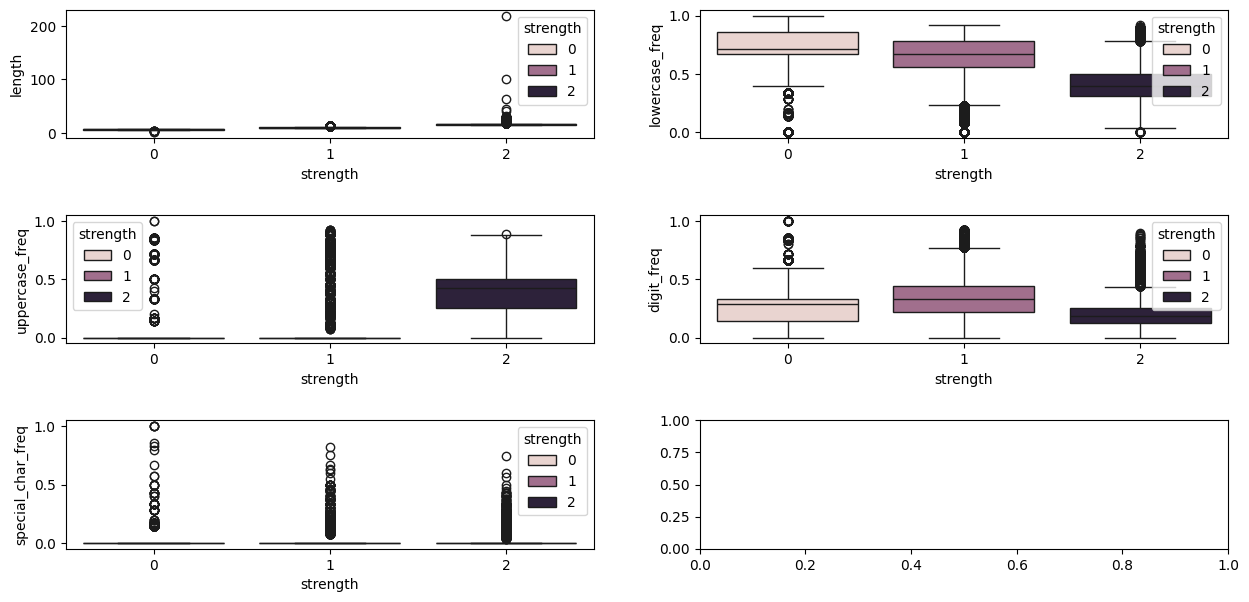

In [44]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

## 6.. Feature Importance

In [53]:
def get_dist(data , feature):

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)

    sns.violinplot(x='strength' , y=feature , data=data )

    plt.subplot(1,2,2)

    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

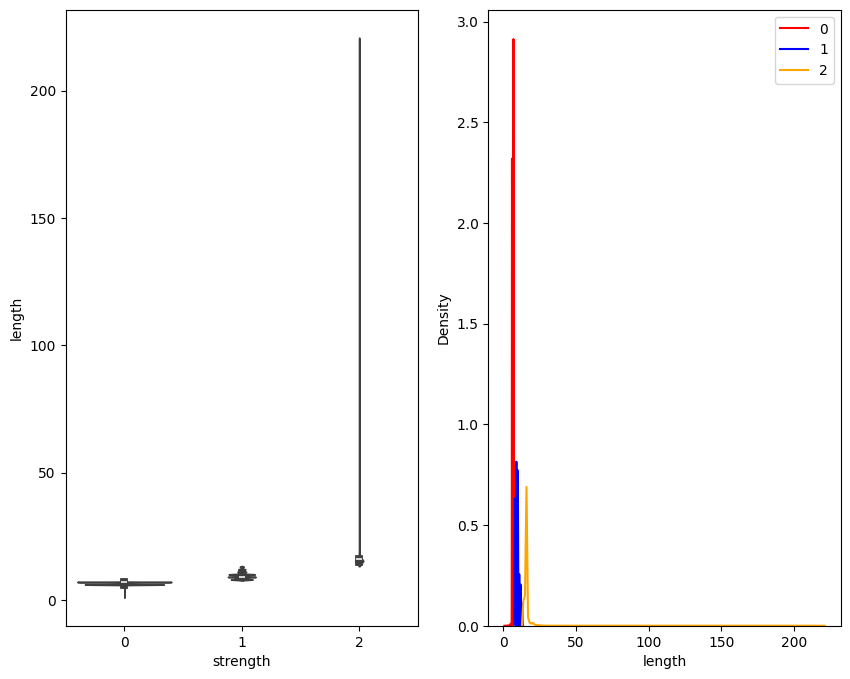

In [54]:
get_dist(data , "length")

**we have few overlappping region in distribution plot
when class is 2 , we have higher value of 'length' than class 1 & class 0
it means 'length' is a interesting feature as we have very less overlapping region
similarly from violinplot ,we will say on account of less overlappping ,
this feature 'length' is amazing & useful in determining the strength**

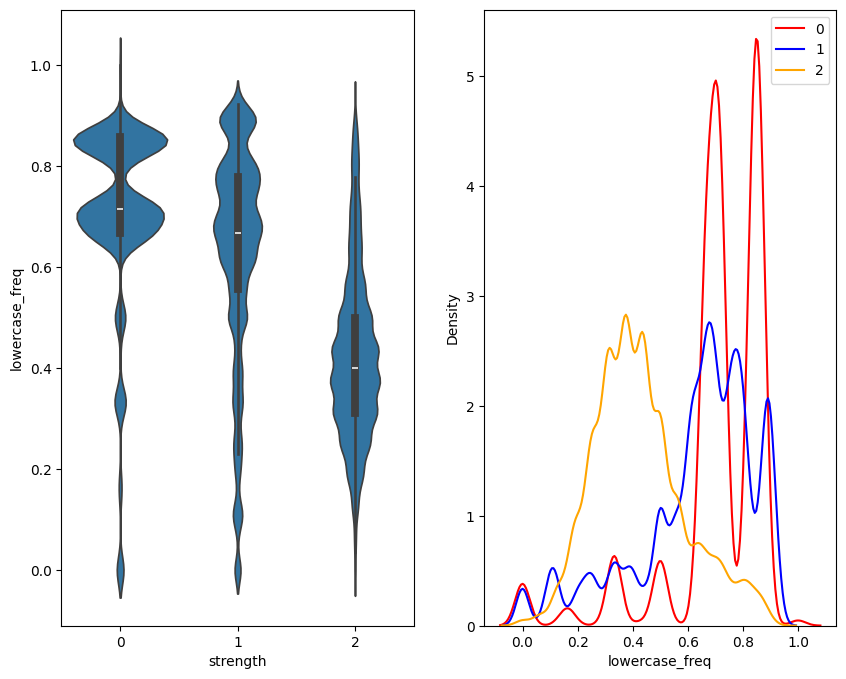

In [55]:
get_dist(data , 'lowercase_freq')

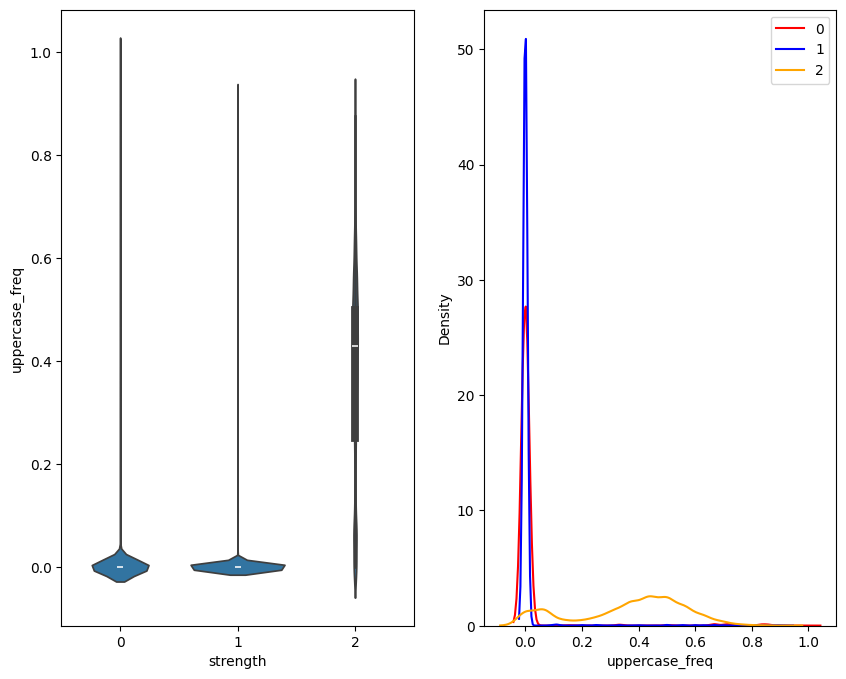

In [56]:
get_dist(data , 'uppercase_freq')

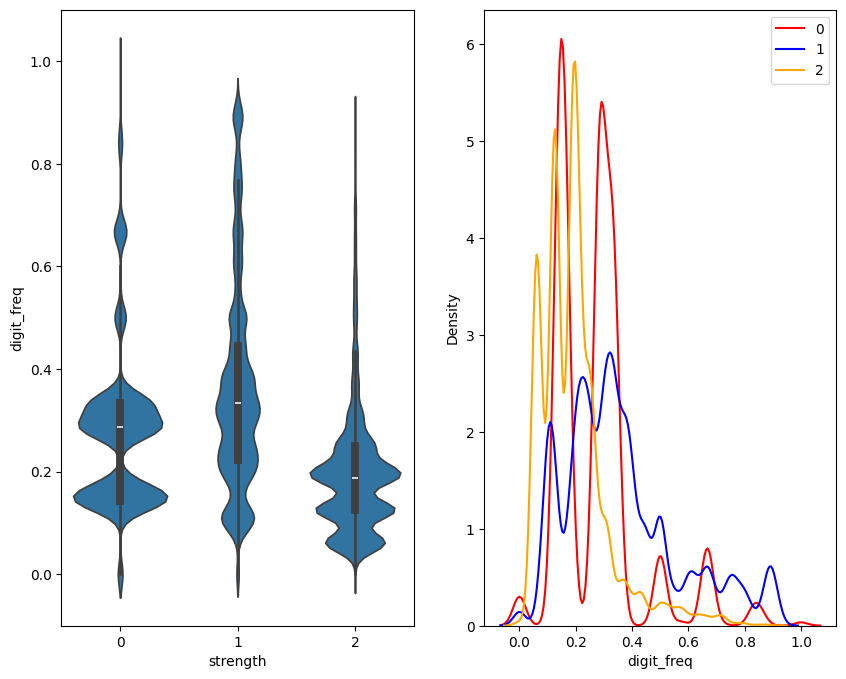

In [57]:
get_dist(data , 'digit_freq')

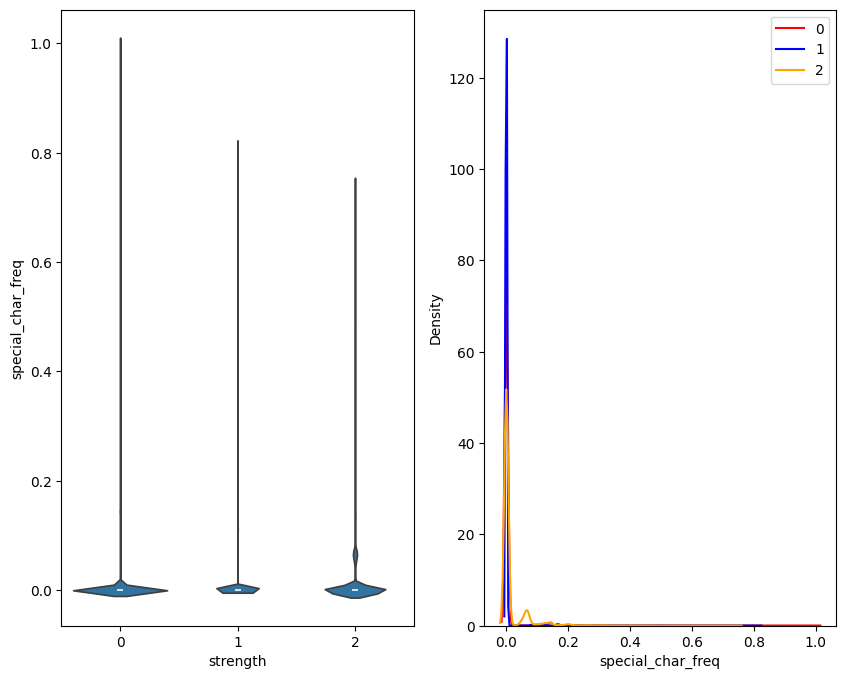

In [58]:
get_dist(data , 'special_char_freq')

## 7.. Applying TF_IDF on data

In [51]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [60]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
84715,gonlat1998,1,10,0.600,0.000,0.400,0.0
57386,titok2000,1,9,0.556,0.000,0.444,0.0
6978,gJZSzhDAyOAWOX81,2,16,0.250,0.625,0.125,0.0
26771,HztlccDUyOAY0uBP,2,16,0.438,0.500,0.062,0.0
48567,brasil157,1,9,0.667,0.000,0.333,0.0
...,...,...,...,...,...,...,...
80806,morenochino87,1,13,0.846,0.000,0.154,0.0
81434,qui123456,1,9,0.333,0.000,0.667,0.0
20174,riwok631,1,8,0.625,0.000,0.375,0.0
38067,VupYpyQONitI327,2,15,0.400,0.400,0.200,0.0


In [62]:
x = list(dataframe["password"])

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(x)

In [66]:
X.shape

(100000, 99)

In [67]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [68]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21846096, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31981149, 0.61088092,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21038575, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33396235, 0.        ,
       0.        , 0.        , 0.        , 0.30338146, 0.        ,
       0.27045864, 0.25851504, 0.        , 0.        , 0.        ,
       0.        , 0.29834326, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [75]:
dataframe["password"]

84715          gonlat1998
57386           titok2000
6978     gJZSzhDAyOAWOX81
26771    HztlccDUyOAY0uBP
48567           brasil157
               ...       
80806       morenochino87
81434           qui123456
20174            riwok631
38067     VupYpyQONitI327
71039            hello008
Name: password, Length: 100000, dtype: object

In [76]:
len(vectorizer.get_feature_names_out())

99

In [77]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [78]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8.. Applying Machine Learning algorithm

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [79]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [80]:
y = dataframe["strength"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [84]:
X_train.shape

(80000, 101)

In [85]:
y_train.shape

(80000,)

In [87]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [88]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 2])

In [89]:
y_pred.shape

(20000,)

In [134]:
count=Counter(y_pred)
count

Counter({1: 16707, 0: 1451, 2: 1842})

In [104]:
(16707/20000,1451/20000,1842/20000)

(0.83535, 0.07255, 0.0921)

In [101]:
data.strength.value_counts()

strength
1    73883
0    13622
2    12495
Name: count, dtype: int64

## 9.. Doing prediction on sample data (user-entered input)

In [105]:
password = "%@123abcd"

In [106]:
sample = np.array([password])
sample

array(['%@123abcd'], dtype='<U9')

In [108]:
sample_matrix = vectorizer.transform(sample)
sample_matrix

<1x99 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [109]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [110]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [111]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [114]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [115]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [117]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)
new_matrix.shape

(1, 101)

In [118]:
clf.predict(new_matrix)

array([0])

In [119]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [120]:
predict()

Enter a password : qwerferfeffsdfs


'Password is weak'

In [121]:
predict()

Enter a password : Qwaqws12@!


'password is strong'

In [128]:
predict()

Enter a password : zxe870819


'Password is normal'

## 10.. Model evaluation :

In [130]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [131]:
accuracy_score(y_test , y_pred)

0.80315

In [132]:
confusion_matrix(y_test , y_pred)

array([[  739,  1918,     1],
       [  646, 13853,   370],
       [   66,   936,  1471]])

In [144]:
count #predicted count

Counter({1: 16707, 0: 1451, 2: 1842})

In [143]:
# The diagonal elements of confusion matrix represent the number of points for which the predicted label is equal to the true label

In [136]:
1451-739+16707-13853+1842-1471

3937

In [140]:
(20000-3937)/20000 #accuarcy

0.80315

In [141]:
accuracy_score(y_test , y_pred)

0.80315

In [133]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.51      0.28      0.36      2658
           1       0.83      0.93      0.88     14869
           2       0.80      0.59      0.68      2473

    accuracy                           0.80     20000
   macro avg       0.71      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000

